<a href="https://colab.research.google.com/github/DaGniG/DespachoEconomico/blob/main/FinalMercados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÓDULO REGULACIÓN

Sección exclusiva para parte 1 de precios de arranque y parada de las unidades generadoras


Tabla CREG 034 de 2001

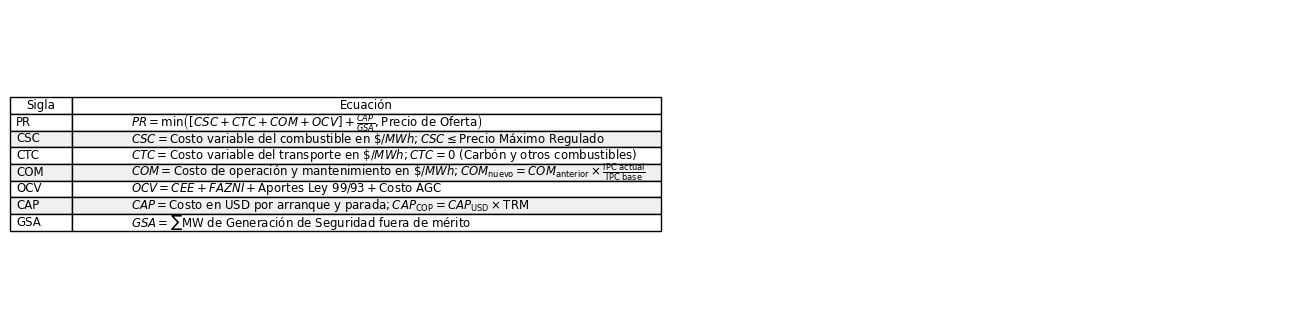

In [ ]:
import matplotlib.pyplot as plt

# Datos de la tabla con solo las siglas en la primera columna
columns = ["Sigla", "Ecuación"]
rows = [
    ["PR", r"$ PR = \min \left( [CSC + CTC + COM + OCV] + \frac{CAP}{GSA}, \text{Precio de Oferta} \right) $"],
    ["CSC", r"$ CSC = \text{Costo variable del combustible en } \$/MWh; CSC \leq \text{Precio Máximo Regulado} $"],
    ["CTC", r"$ CTC = \text{Costo variable del transporte en } \$/MWh; CTC = 0 \text{ (Carbón y otros combustibles)} $"],
    ["COM", r"$ COM = \text{Costo de operación y mantenimiento en } \$/MWh; COM_{\text{nuevo}} = COM_{\text{anterior}} \times \frac{\text{IPC actual}}{\text{IPC base}} $"],
    ["OCV", r"$ OCV = CEE + FAZNI + \text{Aportes Ley 99/93} + \text{Costo AGC} $"],
    ["CAP", r"$ CAP = \text{Costo en USD por arranque y parada}; CAP_{\text{COP}} = CAP_{\text{USD}} \times \text{TRM} $"],
    ["GSA", r"$ GSA = \sum \text{MW de Generación de Seguridad fuera de mérito} $"]
]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 4))  # Ajuste del tamaño
ax.axis("tight")
ax.axis("off")

# Crear la tabla
table = ax.table(cellText=rows, colLabels=columns, cellLoc="left", loc="left", colWidths=[0.1, 0.95])

# Ajustar tamaño de fuente
table.auto_set_font_size(False)
table.set_fontsize(8.5)

# Aplicar colores alternos a las filas
colors = ["#f0f0f0", "#ffffff"]
for i, key in enumerate(table.get_celld().keys()):
    cell = table[key]
    if key[0] > 0:  # Evitar cambiar el encabezado
        cell.set_facecolor(colors[key[0] % 2])

# Guardar la imagen
plt.savefig("reconciliacion_positiva_siglas.png", dpi=300, bbox_inches="tight")
plt.show()


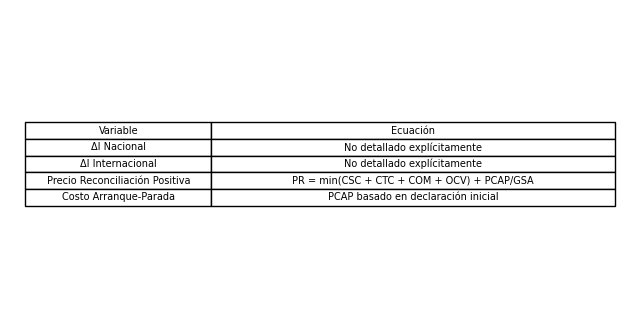

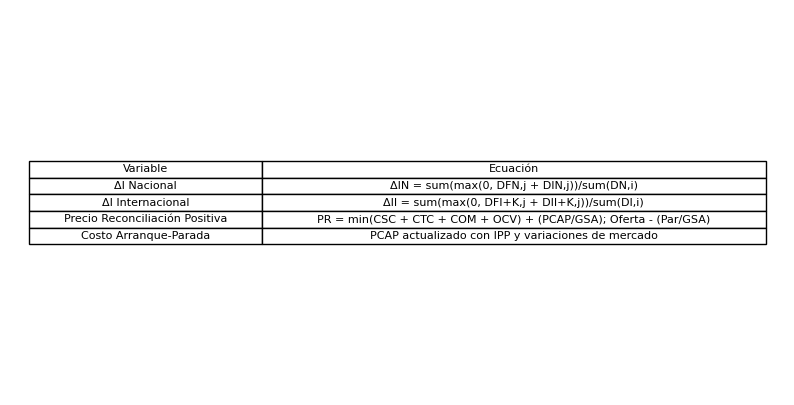

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos para la tabla de CREG 034-2001
data_2001 = {
    'Variable': ['ΔI Nacional', 'ΔI Internacional', 'Precio Reconciliación Positiva', 'Costo Arranque-Parada'],
    'Ecuación': [
        'No detallado explícitamente',
        'No detallado explícitamente',
        'PR = min(CSC + CTC + COM + OCV) + PCAP/GSA',
        'PCAP basado en declaración inicial'
    ]
}

df_2001 = pd.DataFrame(data_2001)
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_2001.values, colLabels=df_2001.columns, cellLoc='center', loc='center', colWidths=[0.3, 0.65])
#plt.title("Ecuaciones de CREG 034-2001")
plt.show()

# Datos para la tabla de CREG 044-2020
data_2020 = {
    'Variable': ['ΔI Nacional', 'ΔI Internacional', 'Precio Reconciliación Positiva', 'Costo Arranque-Parada'],
    'Ecuación': [
        'ΔIN = sum(max(0, DFN,j + DIN,j))/sum(DN,i)',
        'ΔII = sum(max(0, DFI+K,j + DII+K,j))/sum(DI,i)',
        'PR = min(CSC + CTC + COM + OCV) + (PCAP/GSA); Oferta - (Par/GSA)',
        'PCAP actualizado con IPP y variaciones de mercado'
    ]
}

df_2020 = pd.DataFrame(data_2020)
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_2020.values, colLabels=df_2020.columns, cellLoc='center', loc='center',colWidths=[0.3, 0.65])
#plt.title("Ecuaciones de CREG 044-2020")
plt.show()


In [ ]:
import numpy as np

# Parámetros definidos
CSC = 2.94  # Costo variable del combustible ($/MWh)
CTC = 0.0  # Costo variable del transporte ($/MWh); 0 para GAS NATURAL
TRM = 4158.38  # Tasa de cambio representativa del mercado (COP/USD)
GSA = 30  # MW de Generación de Seguridad fuera de mérito
Oferta = 194.34  # Precio de oferta de la planta ($/MWh)
PAR = 1500  # Parámetro PAR según la metodología

# Parámetros para el cálculo del PCAP
A = 0.25  # Porcentaje de la inversión afectado por arranque-parada
I = 713.7*100000  # Inversión total actualizada en dólares (USD); TERMOCENTRO3 85 MW
N = 20  # Vida útil media en años
H = 8760  # Horas en un año
C = 20  # Tiempo en horas de funcionamiento equivalente al arranque-parada
FRC = 0.13388  # Factor de Recuperación de Capital

# Cálculo de PCAP en USD/MWh
PCAP = (A * FRC * I * C) / H

# Cálculo de COM ajustado a enero de 2025
COM_base = 11999  # COM en COP a diciembre de 2019
IPC_dic2019 = 3.80  # Índice base (ejemplo)
IPC_dic2024 = 5.20 # Índice a diciembre de 2024 (ejemplo)
COM_ajustado = COM_base * (IPC_dic2024 / IPC_dic2019)  # Ajuste por IPC
COM = COM_ajustado / TRM  # Conversión a USD/MWh

# Cálculo de OCV (valores hipotéticos)
CEE = 500  # Costo de Energía Eléctrica en COP/MWh
FAZNI = 200  # FAZNI en COP/MWh
Aportes_Ley_99 = 100  # Aportes Ley 99 de 1993 en COP/MWh
AGC = 50  # Costo unitario por servicio de AGC en COP/MWh
OCV_total = CEE + FAZNI + Aportes_Ley_99 + AGC
OCV = OCV_total / TRM  # Conversión a USD/MWh

# Precio de Reconciliación según CREG 034 de 2001
PR_2001 = min(CSC + CTC + COM + OCV + (PCAP / GSA), Oferta)

# Precio de Reconciliación Positiva según CREG 044 de 2020
PR_2020 = min(CSC + CTC + COM + OCV + (PCAP / GSA), Oferta - (PAR / GSA))

# Imprimir los resultados
print(f"Costo de Arranque-Parada (PCAP): {PCAP:.6f} USD")
print(f"Costo de Operación y Mantenimiento (COM): {COM:.6f} USD/MWh")
print(f"Otros Costos Variables (OCV): {OCV:.6f} USD/MWh")
print(f"Precio de Reconciliación según CREG 034 de 2001: {PR_2001:.6f} USD/MWh")
print(f"Precio de Reconciliación según CREG 044 de 2020: {PR_2020:.6f} USD/MWh")


Costo de Arranque-Parada (PCAP): 5453.776027 USD
Costo de Operación y Mantenimiento (COM): 3.948577 USD/MWh
Otros Costos Variables (OCV): 0.204407 USD/MWh
Precio de Reconciliación según CREG 034 de 2001: 188.885518 USD/MWh
Precio de Reconciliación según CREG 044 de 2020: 144.340000 USD/MWh


# MÓDULO PRE-DESPACHO


Sección exclusiva para parte 2 de pre-despacho ideal con casos de estudio


# COSTO MARGINAL (DESPACHO IDEAL)

Solución óptima encontrada:


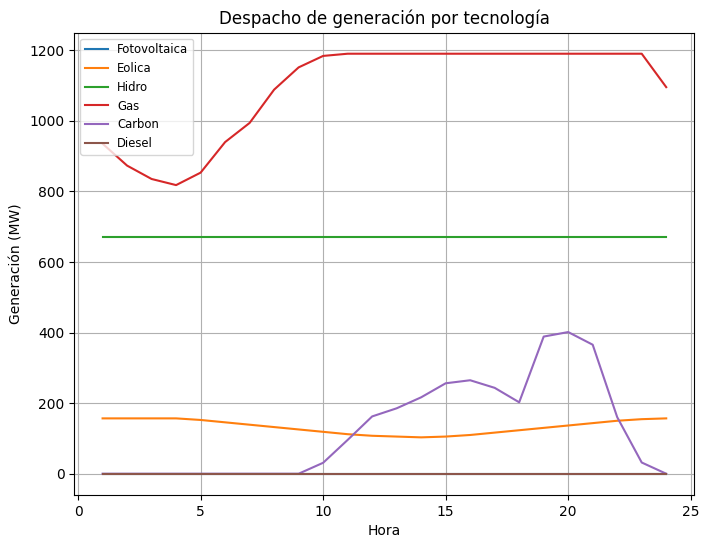

    Hora  Fotovoltaica  Eolica  Hidro      Gas  Carbon  Diesel
0      1           0.0  156.80  672.0   935.11    0.00     0.0
1      2           0.0  156.80  672.0   873.00    0.00     0.0
2      3           0.0  156.80  672.0   835.09    0.00     0.0
3      4           0.0  156.80  672.0   817.75    0.00     0.0
4      5           0.0  152.32  672.0   853.07    0.00     0.0
5      6           0.0  145.60  672.0   939.67    0.00     0.0
6      7           0.0  138.88  672.0   993.94    0.00     0.0
7      8           0.0  132.16  672.0  1088.25    0.00     0.0
8      9           0.0  125.44  672.0  1151.30    0.00     0.0
9     10           0.0  118.72  672.0  1183.78   31.00     0.0
10    11           0.0  112.00  672.0  1190.00   95.75     0.0
11    12           0.0  107.52  672.0  1190.00  162.34     0.0
12    13           0.0  105.28  672.0  1190.00  185.35     0.0
13    14           0.0  103.04  672.0  1190.00  216.51     0.0
14    15           0.0  105.28  672.0  1190.00  256.24 

In [ ]:
!pip install pulp
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros del problema
horas = 24  # Número de horas en el día
tecnologias = ['Fotovoltaica', 'Eolica', 'Hidro', 'Gas', 'Carbon', 'Diesel']

# Nuevos costos marginales para cada tecnología (COP/kWh)
costos_marginales = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 12.23,
    'Carbon': 27.56,
    'Diesel': 711.05
}

# Potencias mínimas y máximas para cada tecnología (MW)
potencias_minimas = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 0,
    'Carbon': 0,
    'Diesel': 0
}

potencias_maximas = {
    'Fotovoltaica': 0,
    'Eolica': 156.8,
    'Hidro': 672,
    'Gas': 85 * 14,
    'Carbon': 170 * 4,
    'Diesel': 165 * 3
}

# Curva de demanda (MW)
demanda = [
    1763.91, 1701.80, 1663.89, 1646.55, 1677.39, 1757.27, 1804.82, 1892.41,
    1948.74, 2005.50, 2069.75, 2131.86, 2152.63, 2181.55, 2223.52, 2236.59,
    2221.81, 2187.54, 2380.51, 2400.00, 2370.87, 2172.34, 2048.33, 1924.11
]

# Generación eólica fija para cada hora
eolica_fija =  [
    156.8, 156.8, 156.8, 156.8, 152.32, 145.6, 138.88, 132.16, 125.44, 118.72,
    112.0, 107.52, 105.28, 103.04, 105.28, 109.76, 116.48, 123.2, 129.92, 136.64,
    143.36, 150.08, 154.56, 156.8
]

# Crear el problema de optimización
problema = pulp.LpProblem("Despacho_Economico", pulp.LpMinimize)

# Definir variables de decisión
generacion = pulp.LpVariable.dicts("Generacion",
                                   ((hora, tech) for hora in range(horas) for tech in tecnologias),
                                   lowBound=0)

# Variables para el número de plantas en operación en cada hora
plantas_gas = pulp.LpVariable.dicts("Plantas_Gas", (hora for hora in range(horas)), lowBound=0, upBound=14, cat='Integer')
plantas_carbon = pulp.LpVariable.dicts("Plantas_Carbon", (hora for hora in range(horas)), lowBound=0, upBound=4, cat='Integer')
plantas_diesel = pulp.LpVariable.dicts("Plantas_Diesel", (hora for hora in range(horas)), lowBound=0, upBound=3, cat='Integer')

# Función objetivo: Minimizar el costo total de generación
problema += pulp.lpSum(
    generacion[hora, tech] * costos_marginales[tech]
    for hora in range(horas)
    for tech in tecnologias
)

# Restricciones
for hora in range(horas):
    # Restricción de balance de energía: Generación = Demanda
    problema += pulp.lpSum(generacion[hora, tech] for tech in tecnologias) == demanda[hora]

    # Restricciones de potencia mínima y máxima para cada tecnología
    for tech in tecnologias:
        problema += generacion[hora, tech] >= potencias_minimas[tech]
        problema += generacion[hora, tech] <= potencias_maximas[tech]

    # Fijar generación eólica a valores diferentes por hora
    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]

    # Restricción específica para el gas
    problema += generacion[hora, 'Gas'] >= plantas_gas[hora] * 50
    problema += generacion[hora, 'Gas'] <= plantas_gas[hora] * 85
    problema += plantas_gas[hora] >= 0
    problema += plantas_gas[hora] <= 14

    # Restricción específica para el carbón
    problema += generacion[hora, 'Carbon'] >= plantas_carbon[hora] * 31
    problema += generacion[hora, 'Carbon'] <= plantas_carbon[hora] * 170
    problema += plantas_carbon[hora] >= 0
    problema += plantas_carbon[hora] <= 4

    # Restricción específica para el diésel
    problema += generacion[hora, 'Diesel'] >= plantas_diesel[hora] * 65
    problema += generacion[hora, 'Diesel'] <= plantas_diesel[hora] * 165
    problema += plantas_diesel[hora] >= 0
    problema += plantas_diesel[hora] <= 3

# Resolver el problema
problema.solve()

# Graficar el despacho hora a hora
if pulp.LpStatus[problema.status] == "Optimal":
    print("Solución óptima encontrada:")
    resultados = {tech: [] for tech in tecnologias}
    horas_lista = list(range(1, horas + 1))

    for hora in range(horas):
        for tech in tecnologias:
            resultados[tech].append(generacion[hora, tech].varValue)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    for tech in tecnologias:
        ax.plot(horas_lista, resultados[tech], label=tech)

    ax.set_xlabel("Hora")
    ax.set_ylabel("Generación (MW)")
    ax.set_title("Despacho de generación por tecnología")
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)  # Activar cuadrícula
    plt.show()

    # Crear tabla de resultados
    tabla_df = pd.DataFrame([{ 'Hora': hora + 1, **{tech: generacion[hora, tech].varValue for tech in tecnologias}} for hora in range(horas)])
    print(tabla_df)
else:
    print("No se encontró una solución óptima.")


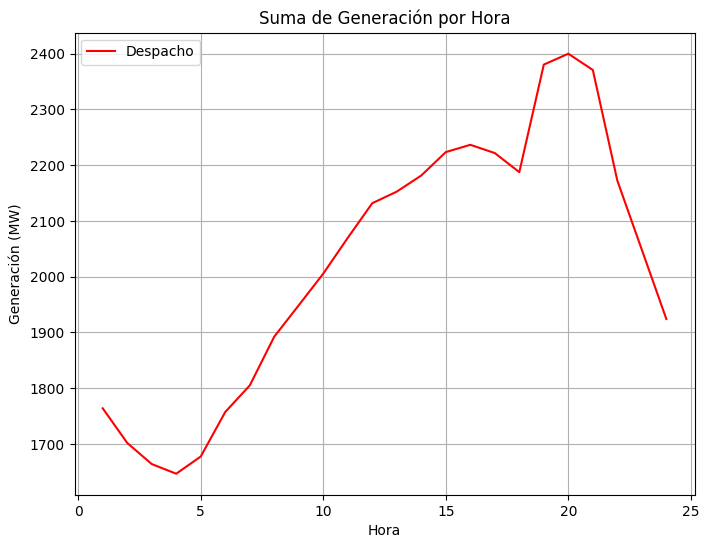

In [ ]:

import matplotlib.pyplot as plt

# Calculate the sum of generation for each hour
total_generation_per_hour = [sum(resultados[tech][i] for tech in tecnologias) for i in range(horas)]

# Create the plot for the total generation
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(horas_lista, total_generation_per_hour, label='Despacho', color = 'red')

ax.set_xlabel("Hora")
ax.set_ylabel("Generación (MW)")
ax.set_title("Suma de Generación por Hora")
ax.legend()
ax.grid(True)  # Activar cuadrícula
plt.show()

In [ ]:
# prompt: determina hora a hora el costo marginal mayor, es decir el más alto entre las tecnologías despachadas, luego para cada hora multiplica la diferencia del costo marginal de cada tecnología con este primero por la cantida de potencia que entrega cada tecnología en esa hora

import pandas as pd

# Assuming 'resultados' and 'costos_marginales' are defined as in the original code

# Create a DataFrame from the results
df_resultados = pd.DataFrame(resultados)
df_resultados['Hora'] = range(1, 25)
df_resultados = df_resultados.set_index('Hora')

# Calculate the marginal cost for each technology
for tech in tecnologias:
    df_resultados[f'{tech}_Costo_Marginal'] = costos_marginales[tech]

# Function to find the maximum marginal cost for each hour
def max_marginal_cost(row):
    marginal_costs = [row[f'{tech}_Costo_Marginal'] for tech in tecnologias if row[tech] > 0 ]
    if marginal_costs:
        return max(marginal_costs)
    else:
      return 0

# Apply the function to find the maximum marginal cost per hour
df_resultados['Costo_Marginal_Maximo'] = df_resultados.apply(max_marginal_cost, axis=1)


# Calculate the difference between the maximum marginal cost and each technology's marginal cost, multiplied by the generation of that technology
for tech in tecnologias:
    df_resultados[f'{tech}_Diferencia_x_Generacion'] = (df_resultados['Costo_Marginal_Maximo'] - df_resultados[f'{tech}_Costo_Marginal']) * df_resultados[tech]

# Print or further process the results
df_resultados


# Calculate the sum of the 'Diferencia_x_Generacion' columns for each hour
hourly_sums = df_resultados[[f'{tech}_Diferencia_x_Generacion' for tech in tecnologias]].sum(axis=1)

hourly_sums


,0
Hora,
1,10136.2240
2,10136.2240
3,10136.2240
4,10136.2240
5,10081.4336
6,9999.2480
7,9917.0624
8,9834.8768
9,9752.6912


# COSTO MEDIO (DESPACHO IDEAL)


Solución óptima encontrada:


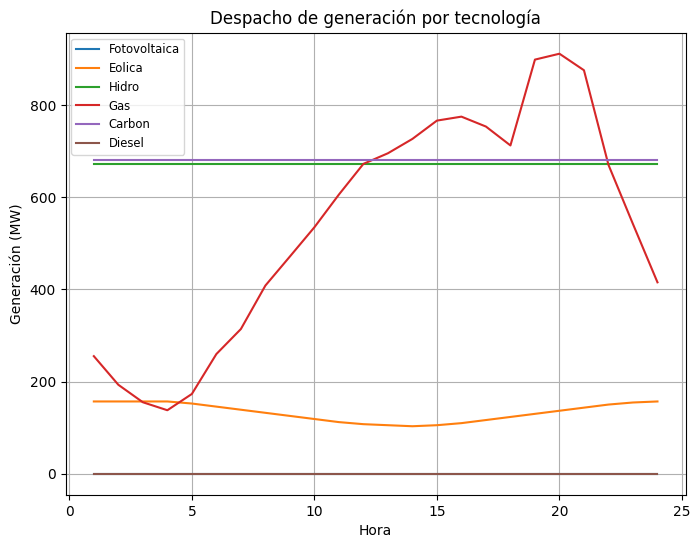

    Hora  Fotovoltaica  Eolica  Hidro     Gas  Carbon  Diesel
0      1           0.0  156.80  672.0  255.11   680.0     0.0
1      2           0.0  156.80  672.0  193.00   680.0     0.0
2      3           0.0  156.80  672.0  155.09   680.0     0.0
3      4           0.0  156.80  672.0  137.75   680.0     0.0
4      5           0.0  152.32  672.0  173.07   680.0     0.0
5      6           0.0  145.60  672.0  259.67   680.0     0.0
6      7           0.0  138.88  672.0  313.94   680.0     0.0
7      8           0.0  132.16  672.0  408.25   680.0     0.0
8      9           0.0  125.44  672.0  471.30   680.0     0.0
9     10           0.0  118.72  672.0  534.78   680.0     0.0
10    11           0.0  112.00  672.0  605.75   680.0     0.0
11    12           0.0  107.52  672.0  672.34   680.0     0.0
12    13           0.0  105.28  672.0  695.35   680.0     0.0
13    14           0.0  103.04  672.0  726.51   680.0     0.0
14    15           0.0  105.28  672.0  766.24   680.0     0.0
15    16

In [ ]:
#!pip install pulp
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros del problema
horas = 24  # Número de horas en el día
tecnologias = ['Fotovoltaica', 'Eolica', 'Hidro', 'Gas', 'Carbon', 'Diesel']

# Nuevos costos medios para cada tecnología (USD/MWh)
costos_medios = {
    'Fotovoltaica': 187.13,
    'Eolica': 207.92,
    'Hidro': 166.34,
    'Gas': 415.84,
    'Carbon': 207.92,
    'Diesel': 831.68
}

# Potencias mínimas y máximas para cada tecnología (MW)
potencias_minimas = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 0,
    'Carbon': 0,
    'Diesel': 0
}

potencias_maximas = {
    'Fotovoltaica': 0,
    'Eolica': 156.8,
    'Hidro': 672,
    'Gas': 85 * 14,
    'Carbon': 170 * 4,
    'Diesel': 165 * 3
}

# Curva de demanda (MW)
demanda = [
    1763.91, 1701.80, 1663.89, 1646.55, 1677.39, 1757.27, 1804.82, 1892.41,
    1948.74, 2005.50, 2069.75, 2131.86, 2152.63, 2181.55, 2223.52, 2236.59,
    2221.81, 2187.54, 2380.51, 2400.00, 2370.87, 2172.34, 2048.33, 1924.11
]

# Generación eólica fija para cada hora
eolica_fija =  [
    156.8, 156.8, 156.8, 156.8, 152.32, 145.6, 138.88, 132.16, 125.44, 118.72,
    112.0, 107.52, 105.28, 103.04, 105.28, 109.76, 116.48, 123.2, 129.92, 136.64,
    143.36, 150.08, 154.56, 156.8
]

# Crear el problema de optimización
problema = pulp.LpProblem("Despacho_Economico", pulp.LpMinimize)

# Definir variables de decisión
generacion = pulp.LpVariable.dicts("Generacion",
                                   ((hora, tech) for hora in range(horas) for tech in tecnologias),
                                   lowBound=0)

# Variables para el número de plantas en operación en cada hora
plantas_gas = pulp.LpVariable.dicts("Plantas_Gas", (hora for hora in range(horas)), lowBound=0, upBound=14, cat='Integer')
plantas_carbon = pulp.LpVariable.dicts("Plantas_Carbon", (hora for hora in range(horas)), lowBound=0, upBound=4, cat='Integer')
plantas_diesel = pulp.LpVariable.dicts("Plantas_Diesel", (hora for hora in range(horas)), lowBound=0, upBound=3, cat='Integer')

# Función objetivo: Minimizar el costo total de generación
problema += pulp.lpSum(
    generacion[hora, tech] * costos_medios[tech]
    for hora in range(horas)
    for tech in tecnologias
)

# Restricciones
for hora in range(horas):
    # Restricción de balance de energía: Generación = Demanda
    problema += pulp.lpSum(generacion[hora, tech] for tech in tecnologias) == demanda[hora]

    # Restricciones de potencia mínima y máxima para cada tecnología
    for tech in tecnologias:
        problema += generacion[hora, tech] >= potencias_minimas[tech]
        problema += generacion[hora, tech] <= potencias_maximas[tech]

    # Fijar generación eólica a valores diferentes por hora
    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]

    # Restricción específica para el gas
    problema += generacion[hora, 'Gas'] >= plantas_gas[hora] * 50
    problema += generacion[hora, 'Gas'] <= plantas_gas[hora] * 85
    problema += plantas_gas[hora] >= 0
    problema += plantas_gas[hora] <= 14

    # Restricción específica para el carbón
    problema += generacion[hora, 'Carbon'] >= plantas_carbon[hora] * 31
    problema += generacion[hora, 'Carbon'] <= plantas_carbon[hora] * 170
    problema += plantas_carbon[hora] >= 0
    problema += plantas_carbon[hora] <= 4

    # Restricción específica para el diésel
    problema += generacion[hora, 'Diesel'] >= plantas_diesel[hora] * 65
    problema += generacion[hora, 'Diesel'] <= plantas_diesel[hora] * 165
    problema += plantas_diesel[hora] >= 0
    problema += plantas_diesel[hora] <= 3

# Resolver el problema
problema.solve()

# Graficar el despacho hora a hora
if pulp.LpStatus[problema.status] == "Optimal":
    print("Solución óptima encontrada:")
    resultados = {tech: [] for tech in tecnologias}
    horas_lista = list(range(1, horas + 1))

    for hora in range(horas):
        for tech in tecnologias:
            resultados[tech].append(generacion[hora, tech].varValue)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    for tech in tecnologias:
        ax.plot(horas_lista, resultados[tech], label=tech)

    ax.set_xlabel("Hora")
    ax.set_ylabel("Generación (MW)")
    ax.set_title("Despacho de generación por tecnología")
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)  # Activar cuadrícula
    plt.show()

    # Crear tabla de resultados
    tabla_df = pd.DataFrame([{ 'Hora': hora + 1, **{tech: generacion[hora, tech].varValue for tech in tecnologias}} for hora in range(horas)])
    print(tabla_df)
else:
    print("No se encontró una solución óptima.")


In [ ]:
# prompt: determina hora a hora el costo marginal mayor, es decir el más alto entre las tecnologías despachadas, luego para cada hora multiplica la diferencia del costo marginal de cada tecnología con este primero por la cantida de potencia que entrega cada tecnología en esa hora

import pandas as pd

# Assuming 'resultados' and 'costos_marginales' are defined as in the original code

# Create a DataFrame from the results
df_resultados = pd.DataFrame(resultados)
df_resultados['Hora'] = range(1, 25)
df_resultados = df_resultados.set_index('Hora')

# Calculate the marginal cost for each technology
for tech in tecnologias:
    df_resultados[f'{tech}_Costo_Marginal'] = costos_medios[tech]

# Function to find the maximum marginal cost for each hour
def max_marginal_cost(row):
    marginal_costs = [row[f'{tech}_Costo_Marginal'] for tech in tecnologias if row[tech] > 0 ]
    if marginal_costs:
        return max(marginal_costs)
    else:
      return 0

# Apply the function to find the maximum marginal cost per hour
df_resultados['Costo_Marginal_Maximo'] = df_resultados.apply(max_marginal_cost, axis=1)


# Calculate the difference between the maximum marginal cost and each technology's marginal cost, multiplied by the generation of that technology
for tech in tecnologias:
    df_resultados[f'{tech}_Diferencia_x_Generacion'] = (df_resultados['Costo_Marginal_Maximo'] - df_resultados[f'{tech}_Costo_Marginal']) * df_resultados[tech]

# Print or further process the results
df_resultados


# Calculate the sum of the 'Diferencia_x_Generacion' columns for each hour
hourly_sums = df_resultados[[f'{tech}_Diferencia_x_Generacion' for tech in tecnologias]].sum(axis=1)

# Print the hourly sums
hourly_sums




,0
Hora,
1,341.651456
2,341.651456
3,341.651456
4,341.651456
5,340.719974
6,339.322752
7,337.925530
8,336.528307
9,335.131085


In [ ]:
# prompt: crea y descarga un excel con hourly_sums

from google.colab import files
hourly_sums.to_excel('hourly_sums.xlsx')
files.download('hourly_sums.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cmarginal + Rampas

Solución óptima encontrada:


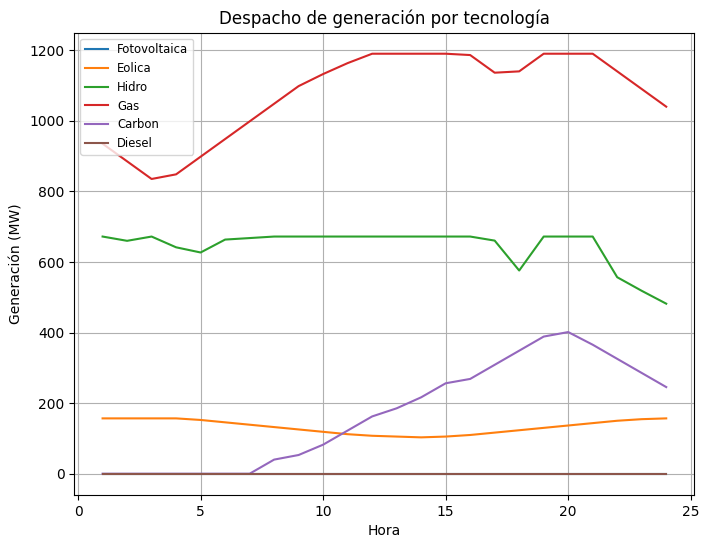

    Hora  Fotovoltaica  Eolica   Hidro      Gas  Carbon  Diesel
0      1           0.0  156.80  672.00   935.11    0.00     0.0
1      2           0.0  156.80  659.89   885.11    0.00     0.0
2      3           0.0  156.80  671.98   835.11    0.00     0.0
3      4           0.0  156.80  641.50   848.25    0.00     0.0
4      5           0.0  152.32  626.82   898.25    0.00     0.0
5      6           0.0  145.60  663.42   948.25    0.00     0.0
6      7           0.0  138.88  667.69   998.25    0.00     0.0
7      8           0.0  132.16  672.00  1048.25   40.00     0.0
8      9           0.0  125.44  672.00  1098.25   53.05     0.0
9     10           0.0  118.72  672.00  1132.44   82.34     0.0
10    11           0.0  112.00  672.00  1163.41  122.34     0.0
11    12           0.0  107.52  672.00  1190.00  162.34     0.0
12    13           0.0  105.28  672.00  1190.00  185.35     0.0
13    14           0.0  103.04  672.00  1190.00  216.51     0.0
14    15           0.0  105.28  672.00  

In [ ]:
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros del problema
horas = 24
tecnologias = ['Fotovoltaica', 'Eolica', 'Hidro', 'Gas', 'Carbon', 'Diesel']

costos_marginales = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 12.23,
    'Carbon': 27.56,
    'Diesel': 711.05
}

# Potencias mínimas y máximas para cada tecnología (MW)
potencias_minimas = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 0,
    'Carbon': 0,
    'Diesel': 0
}

potencias_maximas = {
    'Fotovoltaica': 0,
    'Eolica': 156.8,
    'Hidro': 672,
    'Gas': 85 * 14,
    'Carbon': 170 * 4,
    'Diesel': 165 * 3
}

demanda = [
    1763.91, 1701.80, 1663.89, 1646.55, 1677.39, 1757.27, 1804.82, 1892.41,
    1948.74, 2005.50, 2069.75, 2131.86, 2152.63, 2181.55, 2223.52, 2236.59,
    2221.81, 2187.54, 2380.51, 2400.00, 2370.87, 2172.34, 2048.33, 1924.11
]

eolica_fija =  [
    156.8, 156.8, 156.8, 156.8, 152.32, 145.6, 138.88, 132.16, 125.44, 118.72,
    112.0, 107.52, 105.28, 103.04, 105.28, 109.76, 116.48, 123.2, 129.92, 136.64,
    143.36, 150.08, 154.56, 156.8
]

# Curvas de rampa (MW por hora) y tipos de arranque
rampas = {
    'Gas': {'caliente': 50, 'tibio': 30, 'frio': 10},
    'Carbon': {'caliente': 40, 'tibio': 25, 'frio': 15},
    'Diesel': {'caliente': 60, 'tibio': 40, 'frio': 20}
}

problema = pulp.LpProblem("Despacho_Economico", pulp.LpMinimize)

generacion = pulp.LpVariable.dicts("Generacion",
                                   ((hora, tech) for hora in range(horas) for tech in tecnologias),
                                   lowBound=0)

plantas = {'Gas': 14, 'Carbon': 4, 'Diesel': 3}

estado_plantas = {}
for tech in plantas:
    for hora in range(horas):
        estado_plantas[(hora, tech)] = pulp.LpVariable(f"Estado_{tech}_{hora}", 0, plantas[tech], cat='Integer')

problema += pulp.lpSum(
    generacion[hora, tech] * costos_marginales[tech]
    for hora in range(horas)
    for tech in tecnologias
)

for hora in range(horas):
    problema += pulp.lpSum(generacion[hora, tech] for tech in tecnologias) == demanda[hora]

     # Restricciones de potencia mínima y máxima para cada tecnología
    for tech in tecnologias:
        problema += generacion[hora, tech] >= potencias_minimas[tech]
        problema += generacion[hora, tech] <= potencias_maximas[tech]

    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]

    for tech in ['Gas', 'Carbon', 'Diesel']:
        if hora > 0:
            problema += generacion[hora, tech] - generacion[hora-1, tech] <= rampas[tech]['caliente']
            problema += generacion[hora, tech] - generacion[hora-1, tech] >= -rampas[tech]['caliente']
        problema += generacion[hora, tech] >= estado_plantas[(hora, tech)] * rampas[tech]['caliente']
        problema += generacion[hora, tech] <= estado_plantas[(hora, tech)] * potencias_maximas[tech] / plantas[tech]


    # Fijar generación eólica a valores diferentes por hora
    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]



problema.solve()

if pulp.LpStatus[problema.status] == "Optimal":
    print("Solución óptima encontrada:")
    resultados = {tech: [] for tech in tecnologias}
    horas_lista = list(range(1, horas + 1))
    for hora in range(horas):
        for tech in tecnologias:
            resultados[tech].append(generacion[hora, tech].varValue)

    fig, ax = plt.subplots(figsize=(8, 6))
    for tech in tecnologias:
        ax.plot(horas_lista, resultados[tech], label=tech)

    ax.set_xlabel("Hora")
    ax.set_ylabel("Generación (MW)")
    ax.set_title("Despacho de generación por tecnología")
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)
    plt.show()

    tabla_df = pd.DataFrame([{ 'Hora': hora + 1, **{tech: generacion[hora, tech].varValue for tech in tecnologias}} for hora in range(horas)])
    print(tabla_df)
else:
    print("No se encontró una solución óptima.")


In [ ]:
# prompt: determina hora a hora el costo marginal mayor, es decir el más alto entre las tecnologías despachadas, luego para cada hora multiplica la diferencia del costo marginal de cada tecnología con este primero por la cantida de potencia que entrega cada tecnología en esa hora

import pandas as pd

# Assuming 'resultados' and 'costos_marginales' are defined as in the original code

# Create a DataFrame from the results
df_resultados = pd.DataFrame(resultados)
df_resultados['Hora'] = range(1, 25)
df_resultados = df_resultados.set_index('Hora')

# Calculate the marginal cost for each technology
for tech in tecnologias:
    df_resultados[f'{tech}_Costo_Marginal'] = costos_marginales[tech]

# Function to find the maximum marginal cost for each hour
def max_marginal_cost(row):
    marginal_costs = [row[f'{tech}_Costo_Marginal'] for tech in tecnologias if row[tech] > 0 ]
    if marginal_costs:
        return max(marginal_costs)
    else:
      return 0

# Apply the function to find the maximum marginal cost per hour
df_resultados['Costo_Marginal_Maximo'] = df_resultados.apply(max_marginal_cost, axis=1)


# Calculate the difference between the maximum marginal cost and each technology's marginal cost, multiplied by the generation of that technology
for tech in tecnologias:
    df_resultados[f'{tech}_Diferencia_x_Generacion'] = (df_resultados['Costo_Marginal_Maximo'] - df_resultados[f'{tech}_Costo_Marginal']) * df_resultados[tech]

# Print or further process the results
df_resultados


# Calculate the sum of the 'Diferencia_x_Generacion' columns for each hour
hourly_sums = df_resultados[[f'{tech}_Diferencia_x_Generacion' for tech in tecnologias]].sum(axis=1)

hourly_sums


from google.colab import files
hourly_sums.to_excel('hourly_sums.xlsx')
files.download('hourly_sums.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cmed + Rampas


Solución óptima encontrada:


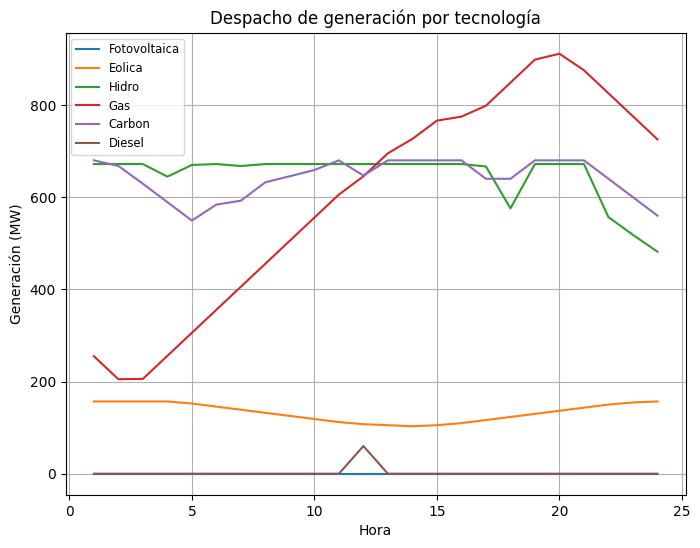

In [ ]:
!pip install pulp
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros del problema
horas = 24
tecnologias = ['Fotovoltaica', 'Eolica', 'Hidro', 'Gas', 'Carbon', 'Diesel']

costos_medios = {
    'Fotovoltaica': 187.13,
    'Eolica': 207.92,
    'Hidro': 166.34,
    'Gas': 415.84,
    'Carbon': 207.92,
    'Diesel': 831.68
}

# Potencias mínimas y máximas para cada tecnología (MW)
potencias_minimas = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 0,
    'Carbon': 0,
    'Diesel': 0
}

potencias_maximas = {
    'Fotovoltaica': 0,
    'Eolica': 156.8,
    'Hidro': 672,
    'Gas': 85 * 14,
    'Carbon': 170 * 4,
    'Diesel': 165 * 3
}

demanda = [
    1763.91, 1701.80, 1663.89, 1646.55, 1677.39, 1757.27, 1804.82, 1892.41,
    1948.74, 2005.50, 2069.75, 2131.86, 2152.63, 2181.55, 2223.52, 2236.59,
    2221.81, 2187.54, 2380.51, 2400.00, 2370.87, 2172.34, 2048.33, 1924.11
]

eolica_fija =  [
    156.8, 156.8, 156.8, 156.8, 152.32, 145.6, 138.88, 132.16, 125.44, 118.72,
    112.0, 107.52, 105.28, 103.04, 105.28, 109.76, 116.48, 123.2, 129.92, 136.64,
    143.36, 150.08, 154.56, 156.8
]

# Curvas de rampa (MW por hora) y tipos de arranque
rampas = {
    'Gas': {'caliente': 50, 'tibio': 30, 'frio': 10},
    'Carbon': {'caliente': 40, 'tibio': 25, 'frio': 15},
    'Diesel': {'caliente': 60, 'tibio': 40, 'frio': 20}
}

problema = pulp.LpProblem("Despacho_Economico", pulp.LpMinimize)

generacion = pulp.LpVariable.dicts("Generacion",
                                   ((hora, tech) for hora in range(horas) for tech in tecnologias),
                                   lowBound=0)

plantas = {'Gas': 14, 'Carbon': 4, 'Diesel': 3}

estado_plantas = {}
for tech in plantas:
    for hora in range(horas):
        estado_plantas[(hora, tech)] = pulp.LpVariable(f"Estado_{tech}_{hora}", 0, plantas[tech], cat='Integer')

problema += pulp.lpSum(
    generacion[hora, tech] * costos_medios[tech]
    for hora in range(horas)
    for tech in tecnologias
)

for hora in range(horas):
    problema += pulp.lpSum(generacion[hora, tech] for tech in tecnologias) == demanda[hora]

     # Restricciones de potencia mínima y máxima para cada tecnología
    for tech in tecnologias:
        problema += generacion[hora, tech] >= potencias_minimas[tech]
        problema += generacion[hora, tech] <= potencias_maximas[tech]

    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]

    for tech in ['Gas', 'Carbon', 'Diesel']:
        if hora > 0:
            problema += generacion[hora, tech] - generacion[hora-1, tech] <= rampas[tech]['caliente']
            problema += generacion[hora, tech] - generacion[hora-1, tech] >= -rampas[tech]['caliente']
        problema += generacion[hora, tech] >= estado_plantas[(hora, tech)] * rampas[tech]['caliente']
        problema += generacion[hora, tech] <= estado_plantas[(hora, tech)] * potencias_maximas[tech] / plantas[tech]


    # Fijar generación eólica a valores diferentes por hora
    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]



problema.solve()

if pulp.LpStatus[problema.status] == "Optimal":
    print("Solución óptima encontrada:")
    resultados = {tech: [] for tech in tecnologias}
    horas_lista = list(range(1, horas + 1))
    for hora in range(horas):
        for tech in tecnologias:
            resultados[tech].append(generacion[hora, tech].varValue)

    fig, ax = plt.subplots(figsize=(8, 6))
    for tech in tecnologias:
        ax.plot(horas_lista, resultados[tech], label=tech)

    ax.set_xlabel("Hora")
    ax.set_ylabel("Generación (MW)")
    ax.set_title("Despacho de generación por tecnología")
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)
    plt.show()

    tabla_df = pd.DataFrame([{ 'Hora': hora + 1, **{tech: generacion[hora, tech].varValue for tech in tecnologias}} for hora in range(horas)])
    print(tabla_df)
else:
    print("No se encontró una solución óptima.")


In [ ]:
# prompt: determina hora a hora el costo marginal mayor, es decir el más alto entre las tecnologías despachadas, luego para cada hora multiplica la diferencia del costo marginal de cada tecnología con este primero por la cantida de potencia que entrega cada tecnología en esa hora

import pandas as pd

# Assuming 'resultados' and 'costos_marginales' are defined as in the original code

# Create a DataFrame from the results
df_resultados = pd.DataFrame(resultados)
df_resultados['Hora'] = range(1, 25)
df_resultados = df_resultados.set_index('Hora')

# Calculate the marginal cost for each technology
for tech in tecnologias:
    df_resultados[f'{tech}_Costo_Marginal'] = costos_medios[tech]

# Function to find the maximum marginal cost for each hour
def max_marginal_cost(row):
    marginal_costs = [row[f'{tech}_Costo_Marginal'] for tech in tecnologias if row[tech] > 0 ]
    if marginal_costs:
        return max(marginal_costs)
    else:
      return 0

# Apply the function to find the maximum marginal cost per hour
df_resultados['Costo_Marginal_Maximo'] = df_resultados.apply(max_marginal_cost, axis=1)


# Calculate the difference between the maximum marginal cost and each technology's marginal cost, multiplied by the generation of that technology
for tech in tecnologias:
    df_resultados[f'{tech}_Diferencia_x_Generacion'] = (df_resultados['Costo_Marginal_Maximo'] - df_resultados[f'{tech}_Costo_Marginal']) * df_resultados[tech]

# Print or further process the results
df_resultados


# Calculate the sum of the 'Diferencia_x_Generacion' columns for each hour
hourly_sums = df_resultados[[f'{tech}_Diferencia_x_Generacion' for tech in tecnologias]].sum(axis=1)

# Print the hourly sums
hourly_sums

from google.colab import files
hourly_sums.to_excel('hourly_sums.xlsx')
files.download('hourly_sums.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Integración baterias


COSTO MARGINAL

Solución óptima encontrada:


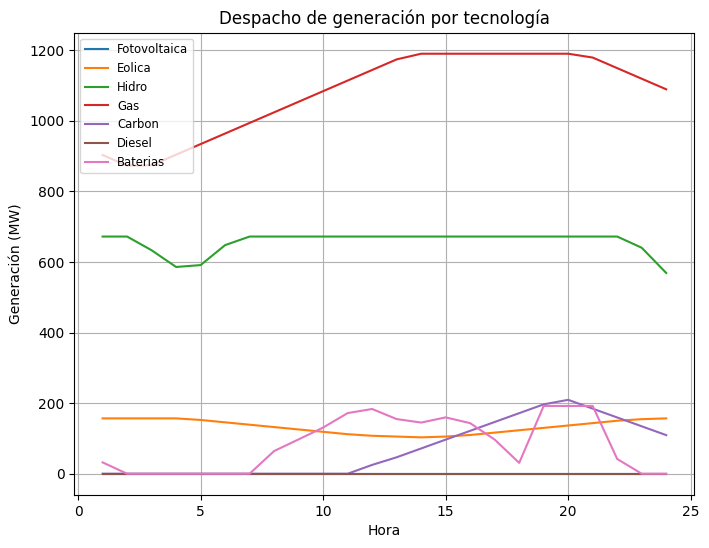

    Hora  Fotovoltaica  Eolica   Hidro      Gas  Carbon  Diesel  Baterias
0      1           0.0  156.80  672.00   903.00    0.00     0.0     32.11
1      2           0.0  156.80  672.00   873.00    0.00     0.0      0.00
2      3           0.0  156.80  633.15   873.94    0.00     0.0      0.00
3      4           0.0  156.80  585.81   903.94    0.00     0.0      0.00
4      5           0.0  152.32  591.13   933.94    0.00     0.0      0.00
5      6           0.0  145.60  647.73   963.94    0.00     0.0      0.00
6      7           0.0  138.88  672.00   993.94    0.00     0.0      0.00
7      8           0.0  132.16  672.00  1023.94    0.00     0.0     64.31
8      9           0.0  125.44  672.00  1053.94    0.00     0.0     97.36
9     10           0.0  118.72  672.00  1083.94    0.00     0.0    130.84
10    11           0.0  112.00  672.00  1113.94    0.00     0.0    171.81
11    12           0.0  107.52  672.00  1143.94   25.00     0.0    183.40
12    13           0.0  105.28  672.00

In [ ]:
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros del problema
horas = 24
tecnologias = ['Fotovoltaica', 'Eolica', 'Hidro', 'Gas', 'Carbon', 'Diesel','Baterias']

costos_marginales = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 12.23,
    'Carbon': 27.56,
    'Diesel': 711.05,
    'Baterias': 20.79
}

# Potencias mínimas y máximas para cada tecnología (MW)
potencias_minimas = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 0,
    'Carbon': 0,
    'Diesel': 0,
    'Baterias': 0
}

potencias_maximas = {
    'Fotovoltaica': 0,
    'Eolica': 156.8,
    'Hidro': 672,
    'Gas': 85 * 14,
    'Carbon': 170 * 4,
    'Diesel': 165 * 3,
    'Baterias': 192
}

demanda = [
    1763.91, 1701.80, 1663.89, 1646.55, 1677.39, 1757.27, 1804.82, 1892.41,
    1948.74, 2005.50, 2069.75, 2131.86, 2152.63, 2181.55, 2223.52, 2236.59,
    2221.81, 2187.54, 2380.51, 2400.00, 2370.87, 2172.34, 2048.33, 1924.11
]

eolica_fija =  [
    156.8, 156.8, 156.8, 156.8, 152.32, 145.6, 138.88, 132.16, 125.44, 118.72,
    112.0, 107.52, 105.28, 103.04, 105.28, 109.76, 116.48, 123.2, 129.92, 136.64,
    143.36, 150.08, 154.56, 156.8
]

# Curvas de rampa (MW por hora) y tipos de arranque
rampas = {
    'Gas': {'caliente': 50, 'tibio': 30, 'frio': 10},
    'Carbon': {'caliente': 40, 'tibio': 25, 'frio': 15},
    'Diesel': {'caliente': 60, 'tibio': 40, 'frio': 20}
}

problema = pulp.LpProblem("Despacho_Economico", pulp.LpMinimize)

generacion = pulp.LpVariable.dicts("Generacion",
                                   ((hora, tech) for hora in range(horas) for tech in tecnologias),
                                   lowBound=0)

plantas = {'Gas': 14, 'Carbon': 4, 'Diesel': 3}

estado_plantas = {}
for tech in plantas:
    for hora in range(horas):
        estado_plantas[(hora, tech)] = pulp.LpVariable(f"Estado_{tech}_{hora}", 0, plantas[tech], cat='Integer')

problema += pulp.lpSum(
    generacion[hora, tech] * costos_marginales[tech]
    for hora in range(horas)
    for tech in tecnologias
)

for hora in range(horas):
    problema += pulp.lpSum(generacion[hora, tech] for tech in tecnologias) == demanda[hora]

     # Restricciones de potencia mínima y máxima para cada tecnología
    for tech in tecnologias:
        problema += generacion[hora, tech] >= potencias_minimas[tech]
        problema += generacion[hora, tech] <= potencias_maximas[tech]

    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]

    for tech in ['Gas', 'Carbon', 'Diesel']:
        if hora > 0:
            problema += generacion[hora, tech] - generacion[hora-1, tech] <= rampas[tech]['tibio']
            problema += generacion[hora, tech] - generacion[hora-1, tech] >= -rampas[tech]['tibio']
        problema += generacion[hora, tech] >= estado_plantas[(hora, tech)] * rampas[tech]['tibio']
        problema += generacion[hora, tech] <= estado_plantas[(hora, tech)] * potencias_maximas[tech] / plantas[tech]


    # Fijar generación eólica a valores diferentes por hora
    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]



problema.solve()

if pulp.LpStatus[problema.status] == "Optimal":
    print("Solución óptima encontrada:")
    resultados = {tech: [] for tech in tecnologias}
    horas_lista = list(range(1, horas + 1))
    for hora in range(horas):
        for tech in tecnologias:
            resultados[tech].append(generacion[hora, tech].varValue)

    fig, ax = plt.subplots(figsize=(8, 6))
    for tech in tecnologias:
        ax.plot(horas_lista, resultados[tech], label=tech)

    ax.set_xlabel("Hora")
    ax.set_ylabel("Generación (MW)")
    ax.set_title("Despacho de generación por tecnología")
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)
    plt.show()

    tabla_df = pd.DataFrame([{ 'Hora': hora + 1, **{tech: generacion[hora, tech].varValue for tech in tecnologias}} for hora in range(horas)])
    print(tabla_df)
else:
    print("No se encontró una solución óptima.")


In [ ]:
# prompt: determina hora a hora el costo marginal mayor, es decir el más alto entre las tecnologías despachadas, luego para cada hora multiplica la diferencia del costo marginal de cada tecnología con este primero por la cantida de potencia que entrega cada tecnología en esa hora

import pandas as pd

# Assuming 'resultados' and 'costos_marginales' are defined as in the original code

# Create a DataFrame from the results
df_resultados = pd.DataFrame(resultados)
df_resultados['Hora'] = range(1, 25)
df_resultados = df_resultados.set_index('Hora')

# Calculate the marginal cost for each technology
for tech in tecnologias:
    df_resultados[f'{tech}_Costo_Marginal'] = costos_marginales[tech]

# Function to find the maximum marginal cost for each hour
def max_marginal_cost(row):
    marginal_costs = [row[f'{tech}_Costo_Marginal'] for tech in tecnologias if row[tech] > 0 ]
    if marginal_costs:
        return max(marginal_costs)
    else:
      return 0

# Apply the function to find the maximum marginal cost per hour
df_resultados['Costo_Marginal_Maximo'] = df_resultados.apply(max_marginal_cost, axis=1)


# Calculate the difference between the maximum marginal cost and each technology's marginal cost, multiplied by the generation of that technology
for tech in tecnologias:
    df_resultados[f'{tech}_Diferencia_x_Generacion'] = (df_resultados['Costo_Marginal_Maximo'] - df_resultados[f'{tech}_Costo_Marginal']) * df_resultados[tech]

# Print or further process the results
df_resultados


# Calculate the sum of the 'Diferencia_x_Generacion' columns for each hour
hourly_sums = df_resultados[[f'{tech}_Diferencia_x_Generacion' for tech in tecnologias]].sum(axis=1)

hourly_sums


from google.colab import files
hourly_sums.to_excel('hourly_sums.xlsx')
files.download('hourly_sums.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Solución óptima encontrada:


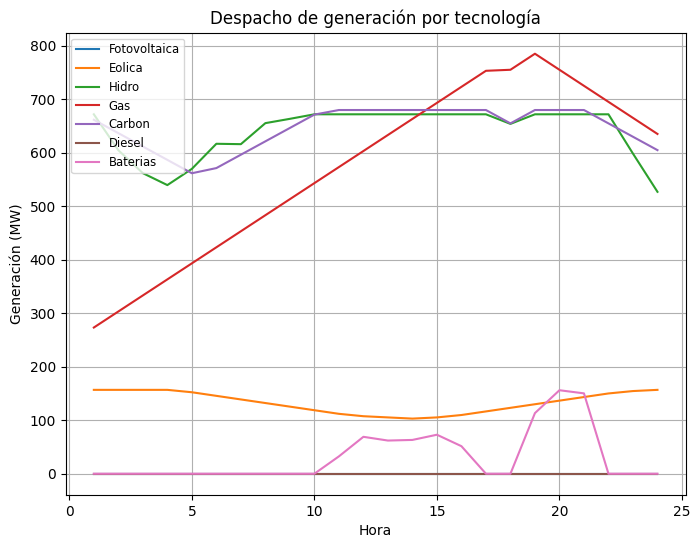

    Hora  Fotovoltaica  Eolica   Hidro     Gas  Carbon  Diesel  Baterias
0      1           0.0  156.80  672.00  273.33  661.78     0.0      0.00
1      2           0.0  156.80  604.89  303.33  636.78     0.0      0.00
2      3           0.0  156.80  561.98  333.33  611.78     0.0      0.00
3      4           0.0  156.80  539.64  363.33  586.78     0.0      0.00
4      5           0.0  152.32  569.96  393.33  561.78     0.0      0.00
5      6           0.0  145.60  616.89  423.33  571.45     0.0      0.00
6      7           0.0  138.88  616.16  453.33  596.45     0.0      0.00
7      8           0.0  132.16  655.47  483.33  621.45     0.0      0.00
8      9           0.0  125.44  663.52  513.33  646.45     0.0      0.00
9     10           0.0  118.72  672.00  543.33  671.45     0.0      0.00
10    11           0.0  112.00  672.00  573.33  680.00     0.0     32.42
11    12           0.0  107.52  672.00  603.33  680.00     0.0     69.01
12    13           0.0  105.28  672.00  633.33  680

In [ ]:
!pip install pulp
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros del problema
horas = 24
tecnologias = ['Fotovoltaica', 'Eolica', 'Hidro', 'Gas', 'Carbon', 'Diesel','Baterias']

costos_medios = {
    'Fotovoltaica': 187.13,
    'Eolica': 207.92,
    'Hidro': 166.34,
    'Gas': 415.84,
    'Carbon': 207.92,
    'Diesel': 831.68,
    'Baterias': 727.72
}

# Potencias mínimas y máximas para cada tecnología (MW)
potencias_minimas = {
    'Fotovoltaica': 0,
    'Eolica': 0,
    'Hidro': 0,
    'Gas': 0,
    'Carbon': 0,
    'Diesel': 0,
    'Baterias': 0
}

potencias_maximas = {
    'Fotovoltaica': 0,
    'Eolica': 156.8,
    'Hidro': 672,
    'Gas': 85 * 14,
    'Carbon': 170 * 4,
    'Diesel': 165 * 3,
    'Baterias': 192
}

demanda = [
    1763.91, 1701.80, 1663.89, 1646.55, 1677.39, 1757.27, 1804.82, 1892.41,
    1948.74, 2005.50, 2069.75, 2131.86, 2152.63, 2181.55, 2223.52, 2236.59,
    2221.81, 2187.54, 2380.51, 2400.00, 2370.87, 2172.34, 2048.33, 1924.11
]

eolica_fija =  [
    156.8, 156.8, 156.8, 156.8, 152.32, 145.6, 138.88, 132.16, 125.44, 118.72,
    112.0, 107.52, 105.28, 103.04, 105.28, 109.76, 116.48, 123.2, 129.92, 136.64,
    143.36, 150.08, 154.56, 156.8
]

# Curvas de rampa (MW por hora) y tipos de arranque
rampas = {
    'Gas': {'caliente': 50, 'tibio': 30, 'frio': 10},
    'Carbon': {'caliente': 40, 'tibio': 25, 'frio': 15},
    'Diesel': {'caliente': 60, 'tibio': 40, 'frio': 20}
}

problema = pulp.LpProblem("Despacho_Economico", pulp.LpMinimize)

generacion = pulp.LpVariable.dicts("Generacion",
                                   ((hora, tech) for hora in range(horas) for tech in tecnologias),
                                   lowBound=0)

plantas = {'Gas': 14, 'Carbon': 4, 'Diesel': 3}

estado_plantas = {}
for tech in plantas:
    for hora in range(horas):
        estado_plantas[(hora, tech)] = pulp.LpVariable(f"Estado_{tech}_{hora}", 0, plantas[tech], cat='Integer')

problema += pulp.lpSum(
    generacion[hora, tech] * costos_medios[tech]
    for hora in range(horas)
    for tech in tecnologias
)

for hora in range(horas):
    problema += pulp.lpSum(generacion[hora, tech] for tech in tecnologias) == demanda[hora]

     # Restricciones de potencia mínima y máxima para cada tecnología
    for tech in tecnologias:
        problema += generacion[hora, tech] >= potencias_minimas[tech]
        problema += generacion[hora, tech] <= potencias_maximas[tech]

    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]

    for tech in ['Gas', 'Carbon', 'Diesel']:
        if hora > 0:
            problema += generacion[hora, tech] - generacion[hora-1, tech] <= rampas[tech]['tibio']
            problema += generacion[hora, tech] - generacion[hora-1, tech] >= -rampas[tech]['tibio']
        problema += generacion[hora, tech] >= estado_plantas[(hora, tech)] * rampas[tech]['tibio']
        problema += generacion[hora, tech] <= estado_plantas[(hora, tech)] * potencias_maximas[tech] / plantas[tech]


    # Fijar generación eólica a valores diferentes por hora
    problema += generacion[hora, 'Eolica'] == eolica_fija[hora]



problema.solve()

if pulp.LpStatus[problema.status] == "Optimal":
    print("Solución óptima encontrada:")
    resultados = {tech: [] for tech in tecnologias}
    horas_lista = list(range(1, horas + 1))
    for hora in range(horas):
        for tech in tecnologias:
            resultados[tech].append(generacion[hora, tech].varValue)

    fig, ax = plt.subplots(figsize=(8, 6))
    for tech in tecnologias:
        ax.plot(horas_lista, resultados[tech], label=tech)

    ax.set_xlabel("Hora")
    ax.set_ylabel("Generación (MW)")
    ax.set_title("Despacho de generación por tecnología")
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)
    plt.show()

    tabla_df = pd.DataFrame([{ 'Hora': hora + 1, **{tech: generacion[hora, tech].varValue for tech in tecnologias}} for hora in range(horas)])
    print(tabla_df)
else:
    print("No se encontró una solución óptima.")


In [ ]:
# prompt: determina hora a hora el costo marginal mayor, es decir el más alto entre las tecnologías despachadas, luego para cada hora multiplica la diferencia del costo marginal de cada tecnología con este primero por la cantida de potencia que entrega cada tecnología en esa hora

import pandas as pd

# Assuming 'resultados' and 'costos_marginales' are defined as in the original code

# Create a DataFrame from the results
df_resultados = pd.DataFrame(resultados)
df_resultados['Hora'] = range(1, 25)
df_resultados = df_resultados.set_index('Hora')

# Calculate the marginal cost for each technology
for tech in tecnologias:
    df_resultados[f'{tech}_Costo_Marginal'] = costos_medios[tech]

# Function to find the maximum marginal cost for each hour
def max_marginal_cost(row):
    marginal_costs = [row[f'{tech}_Costo_Marginal'] for tech in tecnologias if row[tech] > 0 ]
    if marginal_costs:
        return max(marginal_costs)
    else:
      return 0

# Apply the function to find the maximum marginal cost per hour
df_resultados['Costo_Marginal_Maximo'] = df_resultados.apply(max_marginal_cost, axis=1)


# Calculate the difference between the maximum marginal cost and each technology's marginal cost, multiplied by the generation of that technology
for tech in tecnologias:
    df_resultados[f'{tech}_Diferencia_x_Generacion'] = (df_resultados['Costo_Marginal_Maximo'] - df_resultados[f'{tech}_Costo_Marginal']) * df_resultados[tech]

# Print or further process the results
df_resultados


# Calculate the sum of the 'Diferencia_x_Generacion' columns for each hour
hourly_sums = df_resultados[[f'{tech}_Diferencia_x_Generacion' for tech in tecnologias]].sum(axis=1)

# Print the hourly sums
hourly_sums

from google.colab import files
hourly_sums.to_excel('hourly_sums.xlsx')
files.download('hourly_sums.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: genera una interfaz grafica sencilla

import ipywidgets as widgets
from IPython.display import display

# Create a slider widget
slider = widgets.IntSlider(
    min=0,
    max=100,
    step=1,
    description='Value:',
    value=50
)

# Display the slider
display(slider)

# Access the slider's value
slider_value = slider.value
print(f"Slider Value: {slider_value}")


IntSlider(value=50, description='Value:')

Slider Value: 50


In [ ]:
import requests

# URL de la API de Ollama (puerto 11434)
url = "http://host.docker.internal:11435/api/generate"

# Datos de la solicitud
data = {
    "model": "deepseek-r1",  # Nombre del modelo
    "prompt": "¿Qué es la inteligencia artificial?",  # Pregunta o prompt
    "stream": False  # Respuesta completa (no en streaming)
}

# Enviar la solicitud POST
try:
    response = requests.post(url, json=data)
    response.raise_for_status()  # Lanza una excepción si hay un error HTTP
    result = response.json()
    print("Respuesta del modelo:", result["response"])
except requests.exceptions.RequestException as e:
    print("Error de conexión:", e)

Error de conexión: HTTPConnectionPool(host='host.docker.internal', port=11435): Max retries exceeded with url: /api/generate (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7d441c79b1d0>: Failed to resolve 'host.docker.internal' ([Errno -2] Name or service not known)"))
